# CognoRise InfoTech Data Analysis Internship Task 3

## CUSTOMER PERSONALITY ANALYSIS

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [5]:
df = pd.read_csv("marketing_campaign.csv",sep ="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.shape

(2240, 29)

In [7]:
df = df.drop_duplicates()
df.shape

(2240, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df["Z_Revenue"].nunique()

1

In [10]:
df["Z_CostContact"].nunique()

1

# As number of unique categories for Z_Revenue and Z_CostContact is 1,pop that columns

In [11]:
df.pop("Z_CostContact")
df.pop("Z_Revenue")
df.head()
       

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


# Column Names

In [12]:
df.columns = df.columns.str.replace(" ","")
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'],
      dtype='object')

In [13]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"],dayfirst=True)

In [14]:
df = df.dropna()
df.shape

(2216, 27)

# Segreation of Features

In [15]:
num=['recency', 'mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldprods','income']
df_num = df[num]
cat = ["education","marital_status"]
df_cat = df[cat]
dis = ["kidhome","teenhome",'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1','acceptedcmp2', "response", "complain"]
df_dis = df[dis]

# Aggregation on Numerical Features

In [16]:
df_num.agg(["min","max","mean","median","std","skew","kurt"])

,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,income
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
max,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,666666.000000
mean,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,52247.251354
median,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,51381.500000
std,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,25173.076661
skew,0.001648,1.170720,2.101658,2.025577,1.916369,2.103328,1.839231,6.763487
kurt,-1.199777,0.582741,4.054082,5.055477,3.076476,4.106141,3.156342,159.636700


In [17]:
df_cat.agg(["nunique","unique"])

,education,marital_status
nunique,5,8
unique,"[Graduation, PhD, Master, Basic, 2n Cycle]","[Single, Together, Married, Divorced, Widow, A..."


In [18]:
df_dis.agg(["unique","nunique"])

,kidhome,teenhome,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,response,complain
unique,"[0, 1, 2]","[0, 1, 2]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]"
nunique,3,3,2,2,2,2,2,2,2


# Distribution Of education and marital status of customers

<Axes: xlabel='marital_status', ylabel='count'>

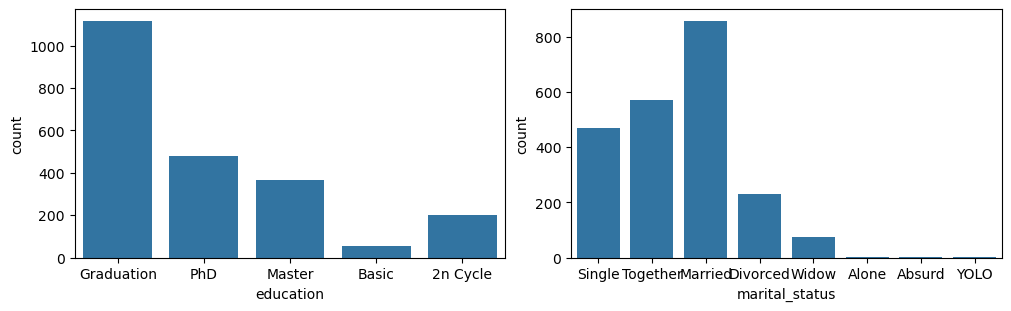

In [19]:
fig,axes = plt.subplots(1,2,figsize = (10,3),layout="constrained")
sns.countplot(data = df,x = "education",ax = axes[0])
sns.countplot(data = df,x = "marital_status",ax=axes[1])


# Creating new columns -- Total amount spend on products and Total no.of purchases made by customer

In [20]:
df.head(3)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0


In [21]:
df["mnt_total"] = df[['mntwines', 'mntfruits','mntmeatproducts', 'mntfishproducts', 'mntsweetproducts','mntgoldprods']].sum(axis=1)
df["total_purchases"] = df[['numdealspurchases', 'numwebpurchases','numcatalogpurchases', 'numstorepurchases']].sum(axis=1)

# Distribution of campaign conducted

<Axes: xlabel='acceptedcmp5', ylabel='count'>

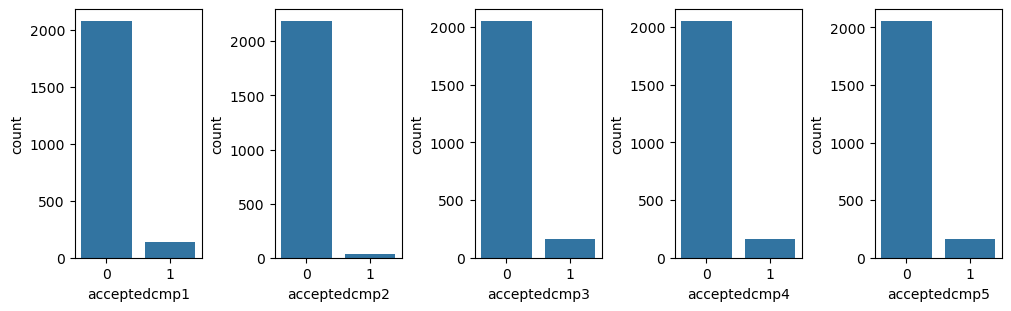

In [22]:
fig,axes = plt.subplots(1,5,figsize =(10,3),layout="constrained")
sns.countplot(data = df,x ="acceptedcmp1",ax=axes[0])
sns.countplot(data = df,x ="acceptedcmp2",ax=axes[1])
sns.countplot(data = df,x ="acceptedcmp3",ax=axes[2])
sns.countplot(data = df,x ="acceptedcmp4",ax=axes[3])
sns.countplot(data = df,x ="acceptedcmp5",ax=axes[4])

# Valuecounts on campaigns conducted

In [23]:
campaigns = df[["acceptedcmp1","acceptedcmp2","acceptedcmp3","acceptedcmp4","acceptedcmp5"]]
for i in campaigns:
    print(i)
    print(df[i].value_counts())
    print("*********************************************************************************")

acceptedcmp1
acceptedcmp1
0    2074
1     142
Name: count, dtype: int64
*********************************************************************************
acceptedcmp2
acceptedcmp2
0    2186
1      30
Name: count, dtype: int64
*********************************************************************************
acceptedcmp3
acceptedcmp3
0    2053
1     163
Name: count, dtype: int64
*********************************************************************************
acceptedcmp4
acceptedcmp4
0    2052
1     164
Name: count, dtype: int64
*********************************************************************************
acceptedcmp5
acceptedcmp5
0    2054
1     162
Name: count, dtype: int64
*********************************************************************************


# Distribution of income

In [24]:
df = df[df["income"]<600000]


<Axes: xlabel='income', ylabel='Count'>

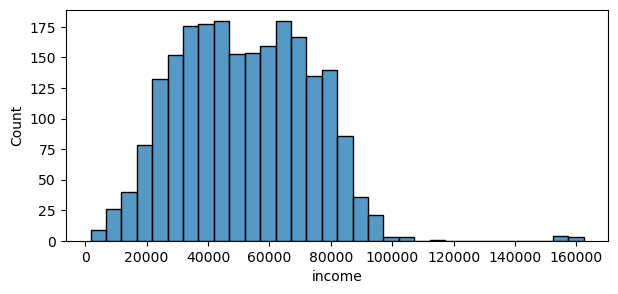

In [25]:
fig = plt.figure(figsize = (7,3))
sns.histplot(data=df,x= "income")

In [26]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response', 'mnt_total', 'total_purchases'],
      dtype='object')

# Kids and Teen who accepted offer in last campaign

<Axes: xlabel='teenhome', ylabel='count'>

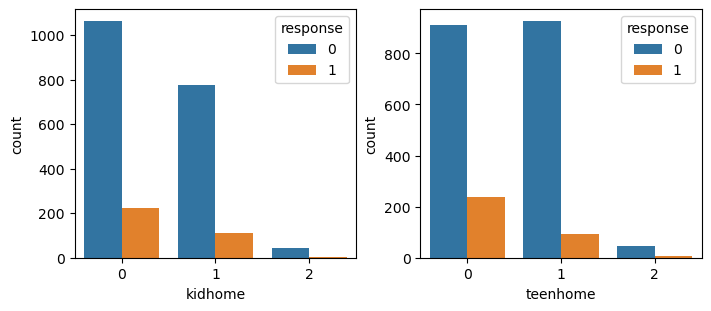

In [28]:
fig,axs = plt.subplots(1,2,figsize =(7,3),layout="constrained")
sns.countplot(data = df, x= "kidhome",hue = "response",ax=axs[0])
sns.countplot(data = df, x = "teenhome",hue = "response",ax=axs[1])

# Education and Marital Status

<Axes: xlabel='education', ylabel='count'>

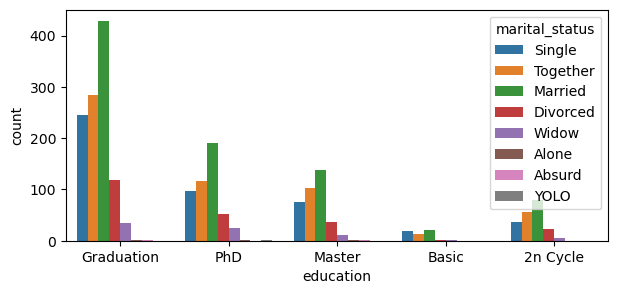

In [29]:
fig = plt.figure(figsize = (7,3))
sns.countplot(data = df,x = "education",hue= "marital_status")

# Income based on marital status

<Axes: xlabel='marital_status', ylabel='income'>

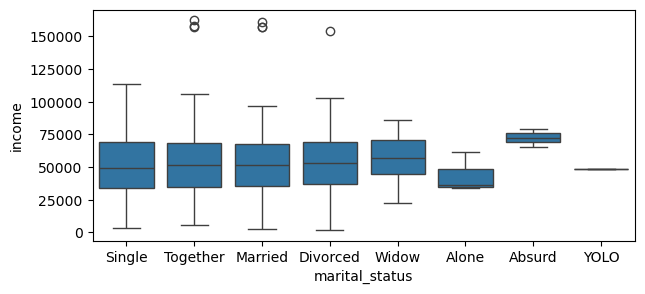

In [30]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(data= df,x = "marital_status",y = "income")

# Income based on Education

<Axes: xlabel='education', ylabel='income'>

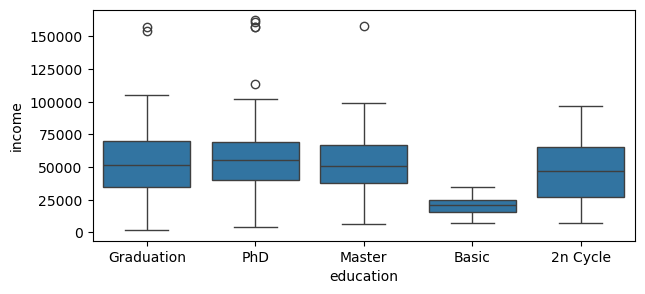

In [31]:
fig =  plt.figure(figsize = (7,3))
sns.boxplot(data=df,x = "education",y = "income")

# Distribution of complains and response

<Axes: xlabel='response', ylabel='count'>

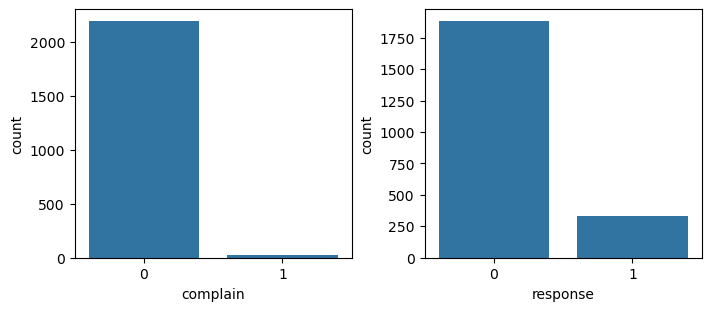

In [32]:
fig,axs = plt.subplots(1,2,figsize=(7,3),layout="constrained")
sns.countplot(data = df,x = "complain",ax=axs[0])
sns.countplot(data = df,x = "response",ax = axs[1])

# Distribution of Products

<Axes: xlabel='mntgoldprods', ylabel='Count'>

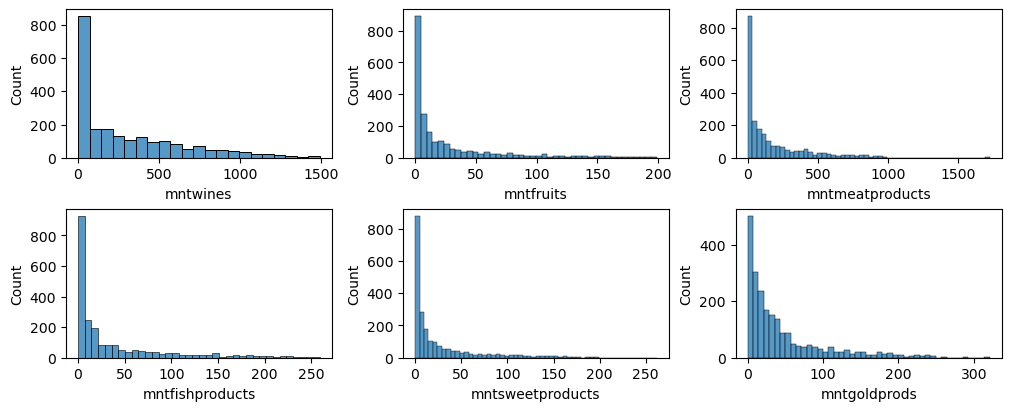

In [33]:
fig,axs = plt.subplots(2,3,figsize = (10,4),layout="constrained")
sns.histplot(data = df,x = "mntwines",ax=axs[0][0])
sns.histplot(data=df,x="mntfruits",ax=axs[0][1])
sns.histplot(data=df,x="mntmeatproducts",ax=axs[0][2])
sns.histplot(data=df,x="mntfishproducts",ax=axs[1][0])
sns.histplot(data=df,x="mntsweetproducts",ax=axs[1][1])
sns.histplot(data=df,x="mntgoldprods",ax=axs[1][2])

<Axes: xlabel='numstorepurchases', ylabel='Count'>

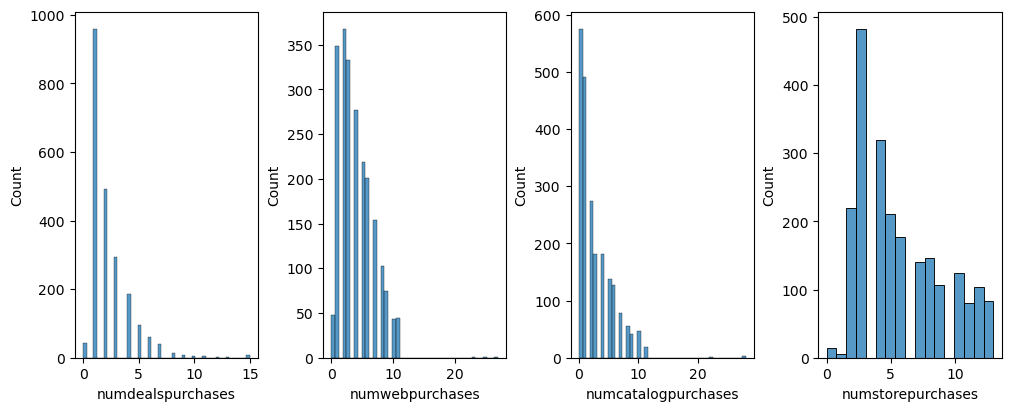

In [34]:
fig,axs = plt.subplots(1,4,figsize = (10,4),layout="constrained")
sns.histplot(data=df,x="numdealspurchases",ax=axs[0])
sns.histplot(data=df,x="numwebpurchases",ax=axs[1])
sns.histplot(data=df,x="numcatalogpurchases",ax=axs[2])
sns.histplot(data=df,x="numstorepurchases",ax=axs[3])


# Overall amount for product and total purchases

<Axes: xlabel='total_purchases', ylabel='Count'>

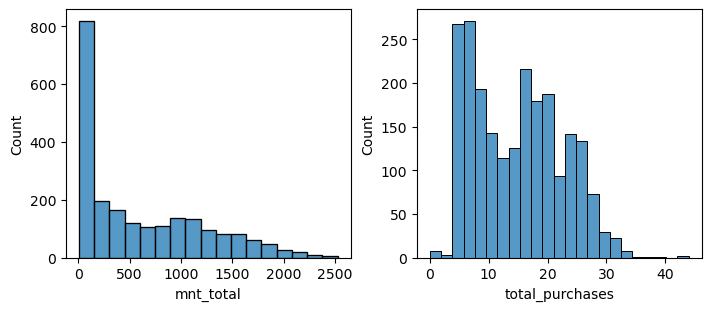

In [35]:
fig,axs = plt.subplots(1,2,figsize = (7,3),layout="constrained")
sns.histplot(data= df,x = "mnt_total",ax=axs[0])
sns.histplot(data = df,x="total_purchases",ax=axs[1])

# Who accepted response based on education and income

<Axes: xlabel='education', ylabel='income'>

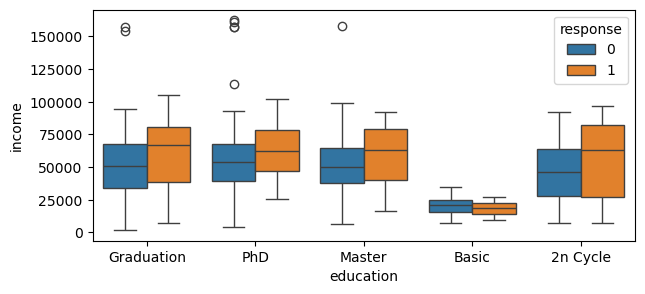

In [36]:
fig = plt.figure(figsize =(7,3))
sns.boxplot(data = df, x= "education",y="income",hue="response")

# Who accepted offer based on marital status ond income

<Axes: xlabel='marital_status', ylabel='income'>

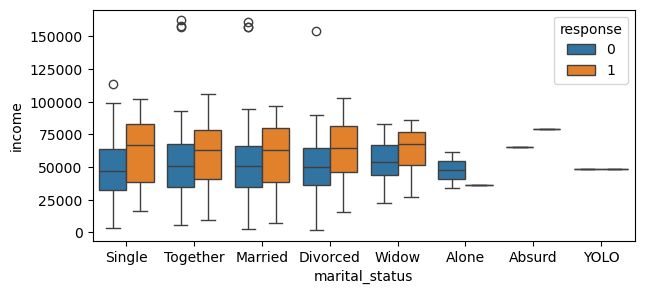

In [37]:
fig = plt.figure(figsize = (7,3))
sns.boxplot(data = df,x ="marital_status",y="income",hue="response")